In [1]:
import pandas as pd # Import the pandas library, aliased as 'pd'

# --- Configuration ---
# Set the path to your CSV file.
# Make sure this path is correct!
# If your CSV is in the same directory as your Jupyter notebook,
# you can just use the filename: 'candidates_chess_data.csv'
csv_file_path = '/home/brishti/candidates_chess_data.csv'

# --- Data Loading ---
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded data from '{csv_file_path}'")
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please check the file path and ensure the CSV is in the correct directory.")
    # Exit or handle the error appropriately if the file isn't found
    exit() # This will stop execution if the file isn't found

# --- Initial Data Inspection ---
print("\n--- First 5 rows of the DataFrame ---")
print(df.head())

print("\n--- DataFrame Information (Data Types, Non-Null Counts) ---")
df.info()

print("\n--- Basic Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Check for Missing Values (Count per Column) ---")
print(df.isnull().sum())

Successfully loaded data from '/home/brishti/candidates_chess_data.csv'

--- First 5 rows of the DataFrame ---
                 Event          Site        Date Round             White  \
0  Budapest Candidates  Budapest HUN  1950.04.10     1  Gideon Stahlberg   
1  Budapest Candidates  Budapest HUN  1950.04.10     1   David Bronstein   
2  Budapest Candidates  Budapest HUN  1950.04.10     1  Andre Lilienthal   
3  Budapest Candidates  Budapest HUN  1950.04.10     1     Salomon Flohr   
4  Budapest Candidates  Budapest HUN  1950.04.10     1    Miguel Najdorf   

               Black      Result  ECO  \
0         Paul Keres  Black Wins  A30   
1       Laszlo Szabo  White Wins  E27   
2     Vasily Smyslov        Draw  D19   
3  Isaac Boleslavsky  Black Wins  D97   
4    Alexander Kotov        Draw  D45   

                                               Moves  \
0  ['1.', 'Nf3', 'Nf6', '2.', 'c4', 'c5', '3.', '...   
1  ['1.', 'd4', 'Nf6', '2.', 'c4', 'e6', '3.', 'N...   
2  ['1.', 'd4', '

Successfully re-loaded data from 'candidates_chess_data.csv'

--- Starting Data Cleaning and Feature Engineering (Revised) ---

'Date' column converted to datetime.
'Moves' column contains chess notation; skipping numerical conversion.
'Year' column ensured to be integer.
Derived 'White_Score' and 'Black_Score' columns based on revised Result mappings.
Derived 'Game_Outcome' column based on revised Result mappings.
Derived 'Winner' column.
Standardized 'Round_Number' column.

--- DataFrame Info after Cleaning and Feature Engineering ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Event               2097 non-null   object        
 1   Site                2097 non-null   object        
 2   Date                1869 non-null   datetime64[ns]
 3   Round               2097 non-null   object        
 4   White    

/tmp/ipykernel_14609/636637478.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


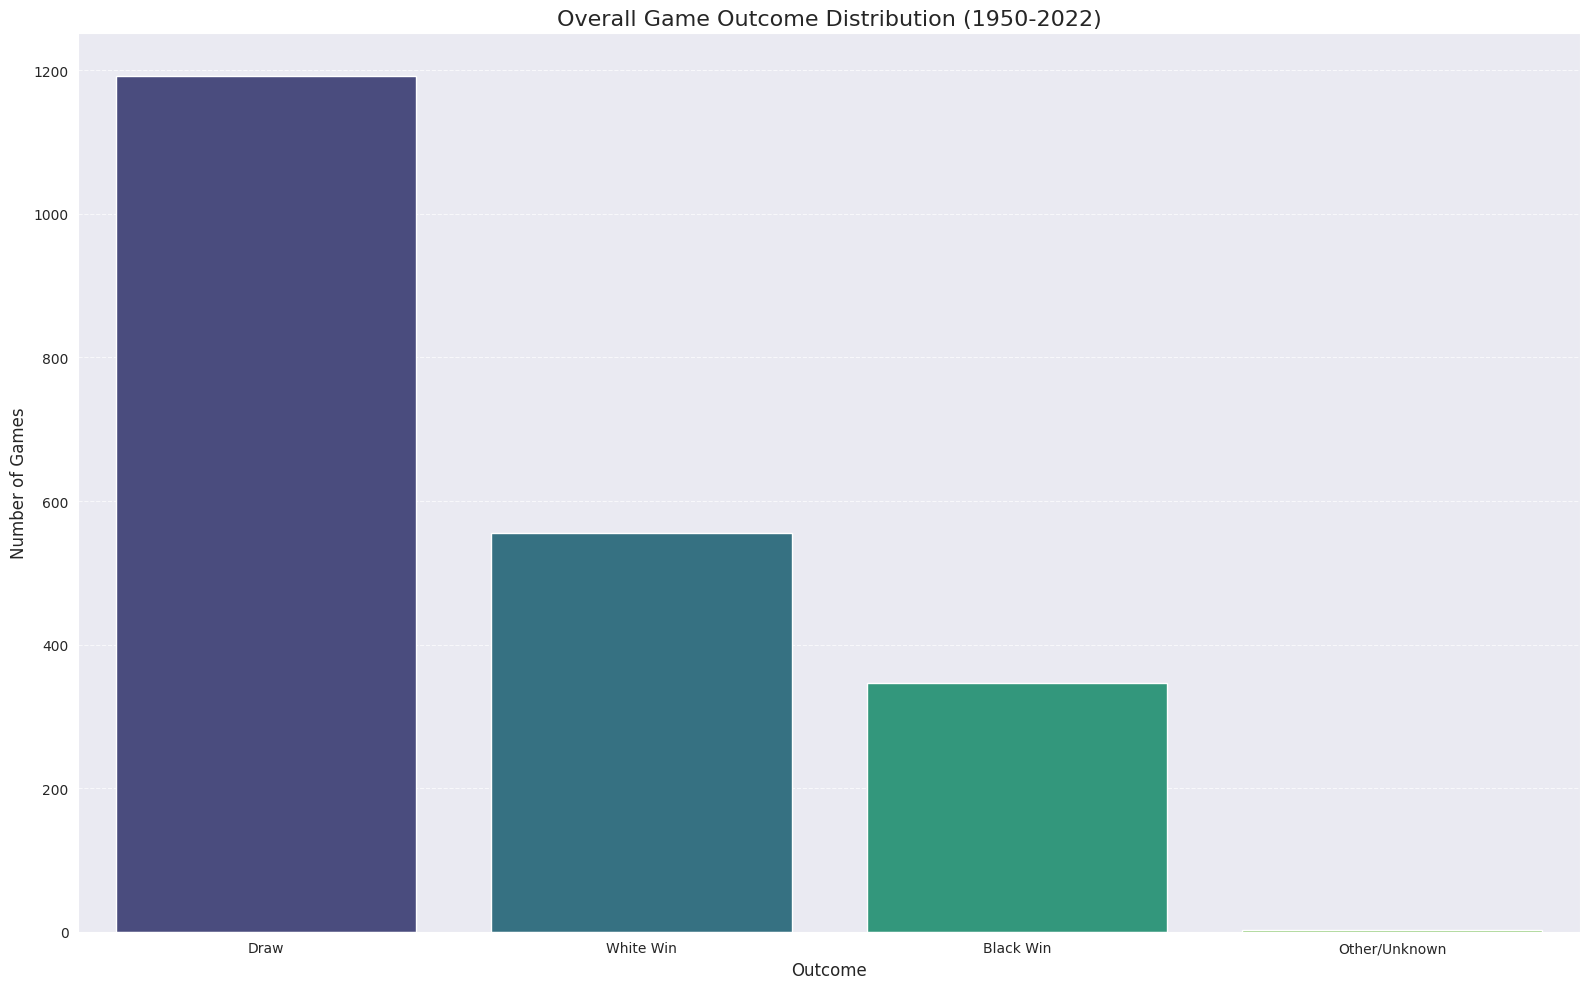


Skipping 'Distribution of Game Length' plot as 'Moves' column contains chess notation, not numeric move counts.

Generating Game Outcomes Trend Over Years...


<Figure size 1600x1000 with 0 Axes>

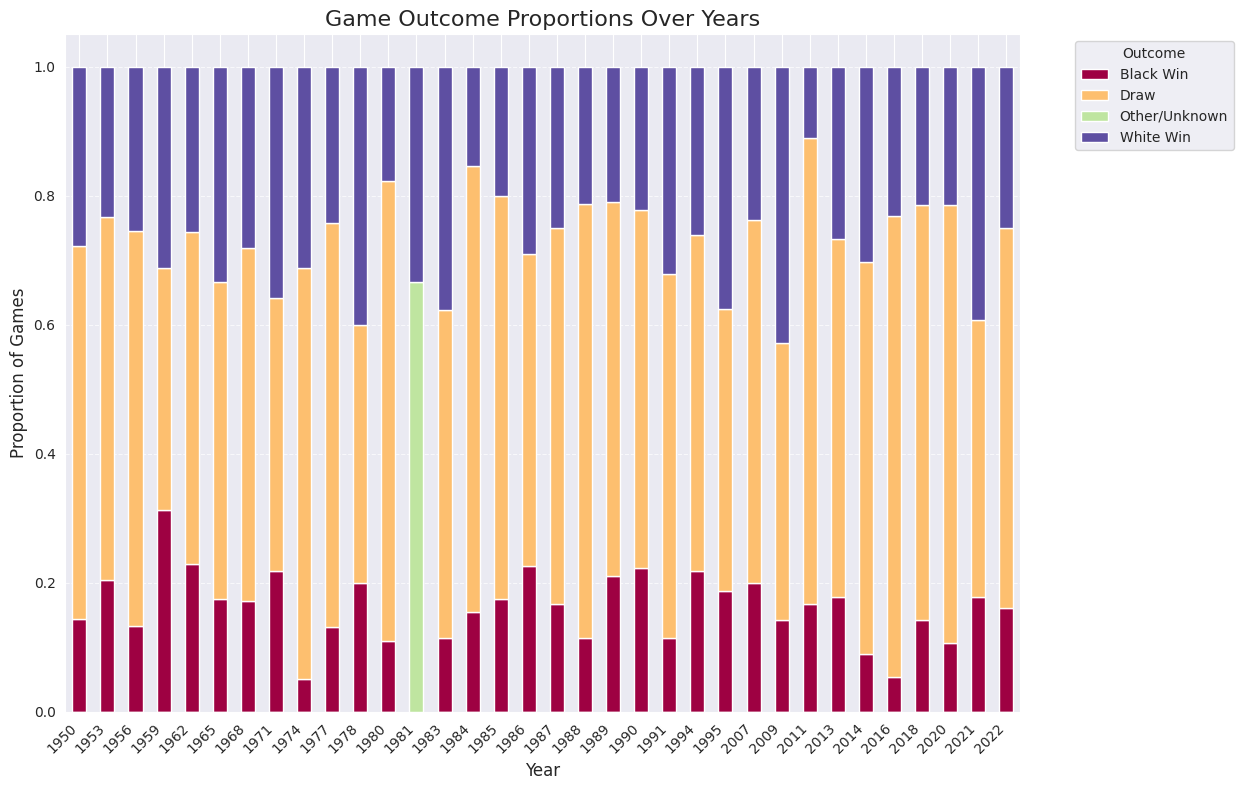


Skipping 'Average Game Length Over Years' plot as 'Moves' column contains chess notation, not numeric move counts.

--- Overall Tournament Visualizations Complete (Revised) ---


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv('candidates_chess_data.csv')
    print(f"Successfully re-loaded data from 'candidates_chess_data.csv'")
except FileNotFoundError:
    print(f"Error: The file 'candidates_chess_data.csv' was not found. Please check the path.")
    exit() # Stop if the file isn't found

print("\n--- Starting Data Cleaning and Feature Engineering (Revised) ---")

# --- 1. Data Type Correction ---

# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("\n'Date' column converted to datetime.")

# 'Moves' column: We now know it contains chess notation, not number of moves.
# We will NOT convert it to numeric or try to use it for move counts.
# For now, we'll keep it as an 'object' (string) column.
print("'Moves' column contains chess notation; skipping numerical conversion.")


# Ensure 'Year' is an integer, coercing errors to NaN and filling with 0 if necessary.
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
print("'Year' column ensured to be integer.")

# --- 2. Feature Engineering (Revised for 'Result' column) ---

# A. Derive White_Score and Black_Score (Numerical Score: 1 for Win, 0.5 for Draw, 0 for Loss)
def get_numerical_result_revised(result, player_color):
    if result == 'White Wins':
        return 1.0 if player_color == 'White' else 0.0
    elif result == 'Black Wins':
        return 1.0 if player_color == 'Black' else 0.0
    elif result == 'Draw':
        return 0.5
    else: # For 'Abandoned' or any other unexpected results
        return pd.NA # Use pd.NA for nullable float type

df['White_Score'] = df['Result'].apply(lambda x: get_numerical_result_revised(x, 'White'))
df['Black_Score'] = df['Result'].apply(lambda x: get_numerical_result_revised(x, 'Black'))
print("Derived 'White_Score' and 'Black_Score' columns based on revised Result mappings.")

# B. Determine Winner, Loser, or Draw (Revised for 'Result' column)
def get_game_outcome_revised(result):
    if result == 'White Wins':
        return 'White Win'
    elif result == 'Black Wins':
        return 'Black Win'
    elif result == 'Draw':
        return 'Draw'
    else:
        return 'Other/Unknown' # For 'Abandoned' or other unexpected results

df['Game_Outcome'] = df['Result'].apply(get_game_outcome_revised)
print("Derived 'Game_Outcome' column based on revised Result mappings.")

def get_winner_revised(row):
    if row['Game_Outcome'] == 'White Win':
        return row['White']
    elif row['Game_Outcome'] == 'Black Win':
        return row['Black']
    else:
        return 'None' # For Draws or Other/Unknown

df['Winner'] = df.apply(get_winner_revised, axis=1)
print("Derived 'Winner' column.")


# C. Standardize 'Round' if it's like 'R1', 'R2' etc. (No change, as this seemed fine)
df['Round_Number'] = df['Round'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Round_Number'] = pd.to_numeric(df['Round_Number'], errors='coerce').fillna(0).astype(int)
print("Standardized 'Round_Number' column.")


# --- Final Inspection after Cleaning and Feature Engineering ---
print("\n--- DataFrame Info after Cleaning and Feature Engineering ---")
df.info()

print("\n--- First 5 rows of the DataFrame after transformations ---")
print(df.head())

print("\n--- Value counts for new 'Game_Outcome' column ---")
print(df['Game_Outcome'].value_counts()) # Check if 'Unknown' is gone or reduced

print("\n--- Check for any remaining NaNs after conversions ---")
print(df.isnull().sum()[df.isnull().sum() > 0]) # Show only columns with NaNs

print("\n--- Data Cleaning and Feature Engineering Complete ---")


# --- Re-attempting Overall Tournament Visualizations ---
# Set a style for the plots for better aesthetics
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("\n--- Starting Overall Tournament Visualizations (Revised) ---")

# --- 1. Overall Game Outcome Distribution (White Win, Black Win, Draw) ---
print("\nGenerating Game Outcome Distribution...")
plt.figure(figsize=(16, 10)) # Increased width and heightoutcome_counts = df['Game_Outcome'].value_counts()
# Filter out 'Other/Unknown' if it's a minor category and you don't want to plot it
# outcome_counts = outcome_counts[outcome_counts.index != 'Other/Unknown']
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.title('Overall Game Outcome Distribution (1950-2022)', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2. Distribution of Game Length (Number of Moves) ---
# SKIPPING THIS PLOT: As confirmed, 'Moves' column contains PGN, not move counts.
print("\nSkipping 'Distribution of Game Length' plot as 'Moves' column contains chess notation, not numeric move counts.")


# --- 3. Game Outcomes Trend Over Years ---
print("\nGenerating Game Outcomes Trend Over Years...")
yearly_outcomes = df.groupby(['Year', 'Game_Outcome']).size().unstack(fill_value=0)

# Calculate proportions for stacking, handle potential division by zero if a year has no outcomes
yearly_outcomes_sum = yearly_outcomes.sum(axis=1)
# Replace 0 sums with 1 to avoid division by zero, then calculate prop, then revert to 0 if sum was 0
yearly_outcomes_prop = yearly_outcomes.divide(yearly_outcomes_sum.replace(0,1), axis=0)
yearly_outcomes_prop.loc[yearly_outcomes_sum == 0] = 0 # Set rows where sum was 0 back to 0

plt.figure(figsize=(16, 10)) # Increased width and height# Ensure the 'Other/Unknown' is at the bottom or ordered consistently if you want it
# If you prefer to exclude 'Other/Unknown' from the proportions:
# yearly_outcomes_prop = yearly_outcomes_prop.drop(columns=['Other/Unknown'], errors='ignore')
yearly_outcomes_prop.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(14, 8))
plt.title('Game Outcome Proportions Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of Games', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


# --- 4. Average Game Length (Moves) Over Years ---
# SKIPPING THIS PLOT: As confirmed, 'Moves' column contains PGN, not move counts.
print("\nSkipping 'Average Game Length Over Years' plot as 'Moves' column contains chess notation, not numeric move counts.")

print("\n--- Overall Tournament Visualizations Complete (Revised) ---")

In [18]:
import pandas as pd

# Assuming 'df' is your current, cleaned, and enhanced DataFrame

# Specify the filename for your Excel file
output_excel_filename = 'cleaned_candidates_chess_data.xlsx'

# Export the DataFrame to Excel
# index=False prevents pandas from writing the DataFrame index as a column in Excel
df.to_excel(output_excel_filename, index=False)

print(f"DataFrame successfully exported to '{output_excel_filename}'")

DataFrame successfully exported to 'cleaned_candidates_chess_data.xlsx'
